In [1]:
import torch
from torch.autograd.functional import hessian
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_Sigmainv, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()

In [12]:
def linear_inv(y, theta):
    a, b = theta
    return (y-b)/a

In [23]:
def logpr(y, mean, covinv, theta):
    a, b = theta
    Xstar = (y - b)/a
    return - 0.5 * (Xstar - mean).T @ covinv @ (Xstar - mean)

def logpr_reg(y, mean, covinv, theta):
    a, b = theta
    Xstar = (y - b)/a
    reg = np.log(abs(a)) * len(y)
    return - reg - 0.5 * (Xstar - mean).T @ covinv @ (Xstar - mean)

In [24]:
def minimise_linear(y, mean, covinv, x0):
    def func(theta):
        return - logpr_reg(y, mean, covinv, theta)
    return minimize(func, x0)

def minimise_linear_unreg(y, mean, covinv, x0):
    def func(theta):
        return - logpr(y, mean, covinv, theta)
    return minimize(func, x0)

In [177]:
nk = nk_dead(nlive=500, ndead=50)
mean = X_mu(nk)
covinv = X_Sigmainv(nk)

In [178]:
# Make test sample
X = generate_Xs(nk)
theta_true = 10
y = -1 * X + 0.5

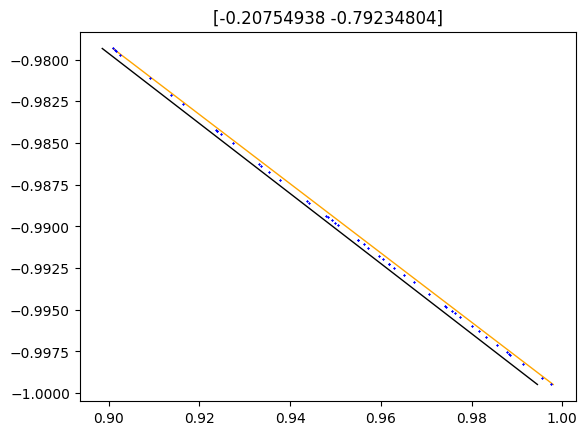

In [215]:
# Make test sample
X = generate_Xs(nk)
theta_true = 10
y = simple.func(X, theta_true)
x0 = [-0.2, -0.8]
theta_cg = minimise_linear(y, mean, covinv, x0).x
theta_ls = minimise_linear_unreg(y, mean, np.eye(len(y)), x0).x
plt.plot(linear_inv(y, theta_ls), y, lw=1, color='black');
plt.plot(linear_inv(y, theta_cg), y, lw=1, color='orange');
plt.plot(X, y, 'x', ms=1, color='blue');
plt.title(f"{theta_cg}");